In [1]:
import pandas as pd
dataset = pd.read_csv('vehicle.csv')
dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


# Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [3]:
dataset.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
from sklearn import preprocessing
class_le = preprocessing.LabelEncoder()
dataset['class'] = class_le.fit_transform(dataset['class'])

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')

In [6]:
imputed_Dataset = pd.DataFrame(fill_NaN.fit_transform(dataset))
imputed_Dataset.columns = dataset.columns
imputed_Dataset.index = dataset.index
imputed_Dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,2.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,2.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,1.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,2.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,0.0


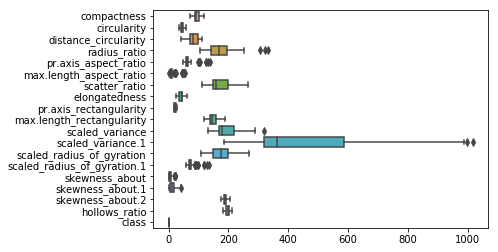

In [7]:
import seaborn as sns
%matplotlib inline
ax = sns.boxplot(data=imputed_Dataset, orient="h")

In [8]:
from scipy import stats
imputed_Dataset = imputed_Dataset.apply(stats.zscore)

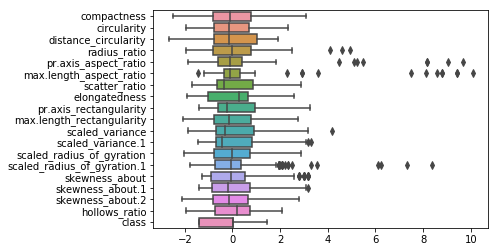

In [9]:
ax = sns.boxplot(data=imputed_Dataset, orient="h")

In [10]:
imputed_Dataset['class'] = dataset['class']

# Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

<Figure size 864x864 with 0 Axes>

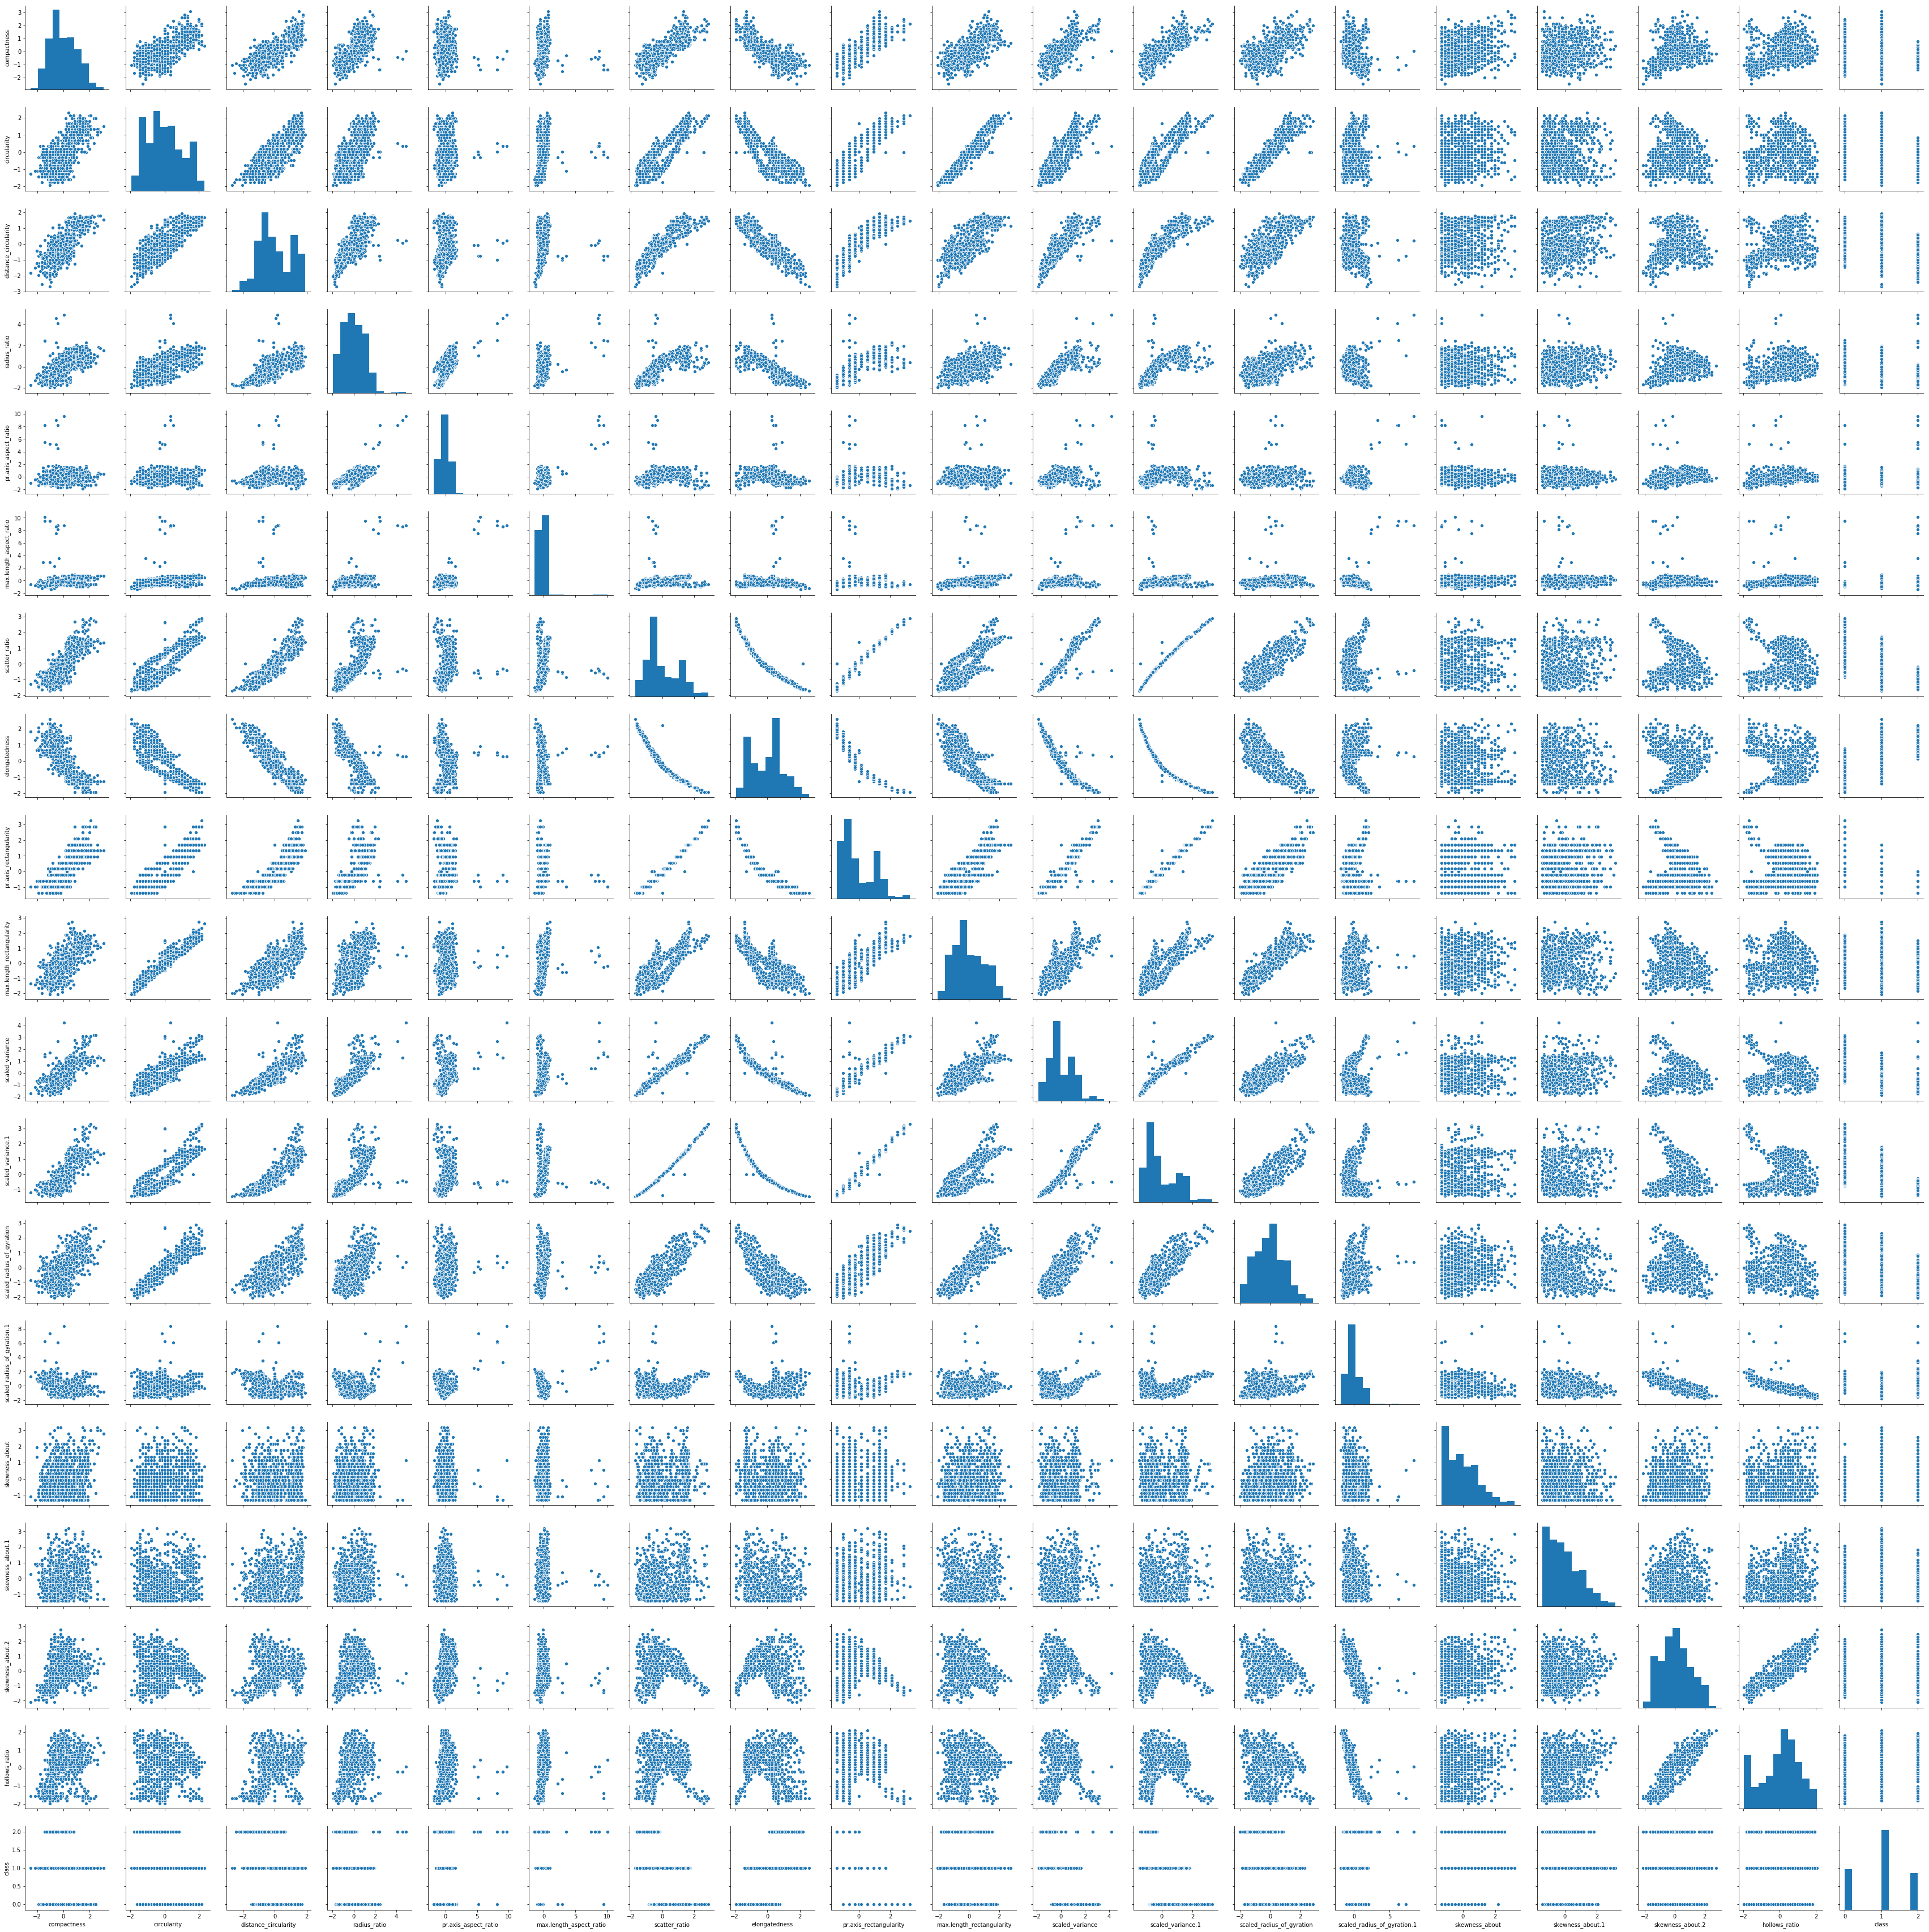

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 12))
sns.pairplot(imputed_Dataset)

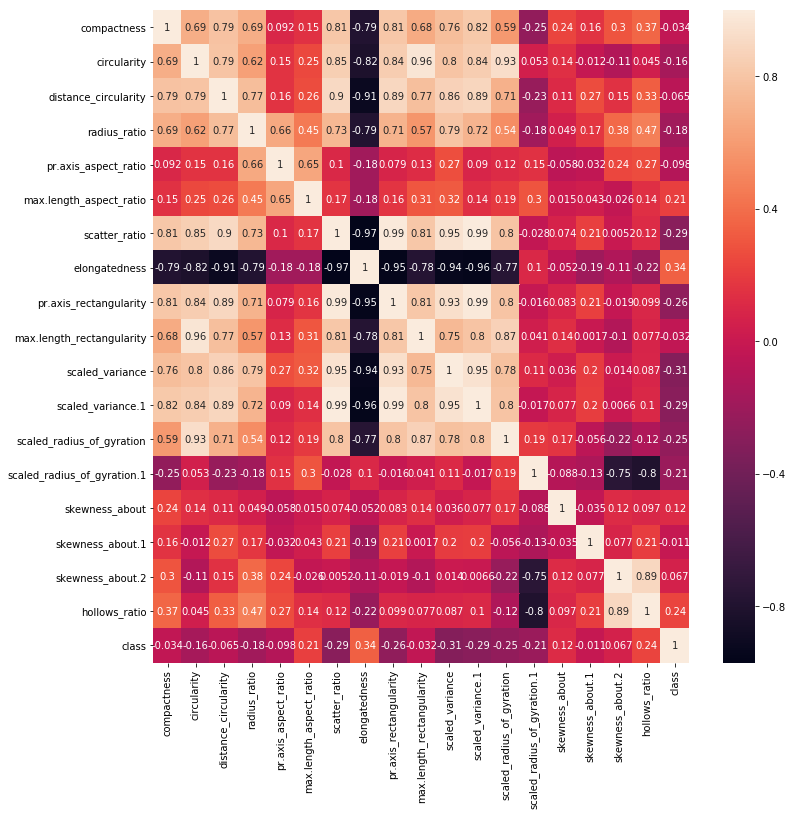

In [12]:
plt.figure(figsize=(12, 12))
sns.heatmap(imputed_Dataset.corr(), annot=True)

In [13]:
imputed_Dataset.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

Here I am going to use all the features, since we are going to use PCA to reduce the features to fixed components

# Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

In [14]:
X = imputed_Dataset.drop(['class'],axis=1)
y = imputed_Dataset['class']

In [15]:
from sklearn.decomposition import PCA

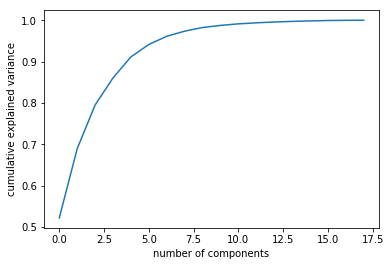

In [16]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [17]:
pca = PCA(n_components=6).fit(X)
pca_df = pca.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.30, random_state=12)

# Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC(gamma='auto')
param_grid = {'C': [0.01, 0.05, 0.5, 1],
              'kernel': ["linear", "rbf"] }
clf = GridSearchCV(model, param_grid, cv=3, iid=False)
clf = clf.fit(X_train, y_train)

In [20]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
pred = clf.predict(X_test)
from sklearn import metrics
print('Accuracy Score')
print(metrics.accuracy_score(y_test, pred))

Accuracy Score
0.8700787401574803


In [22]:
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, pred))

Confusion Matrix
[[ 53   5   3]
 [  9 116   5]
 [  4   7  52]]
